In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

In [2]:
mnist = pd.read_csv('train.csv')

mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
mnist.shape

(42000, 785)

In [4]:
sorted(mnist['label'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [5]:
mnist_features = mnist.drop('label', axis = 1)

In [6]:
mnist_features.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
mnist_label = mnist['label']
mnist_label.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [10]:
def display_image(index):
    print('Digit', mnist_label[index])
    
    plt.imshow(mnist_features.loc[index].values.reshape(28,28), cmap = 'Greys')

Digit 1


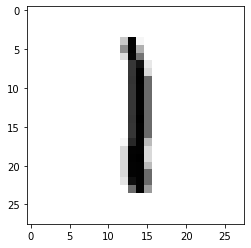

In [15]:
display_image(1000)

In [20]:
kmeans = KMeans(n_clusters = 10, max_iter = 1000).fit(mnist_features)


In [17]:
kmeans_centroids = kmeans.cluster_centers_
kmeans_centroids

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

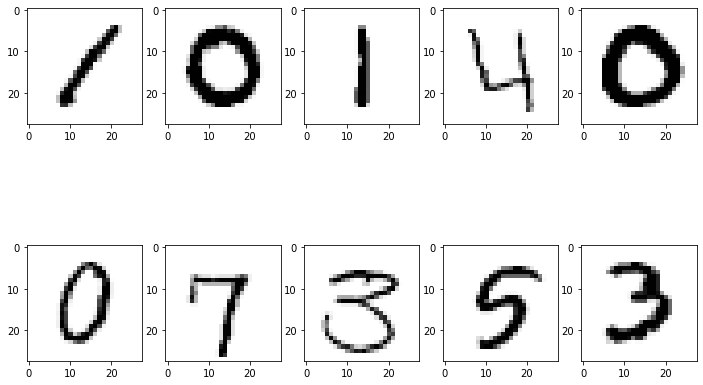

In [21]:
fig, ax = plt.subplots(figsize=(12,8))

for centroid in range(len(kmeans_centroids)):
    plt.subplot(2, 5, centroid+1)
    
    plt.imshow(mnist_features.loc[centroid].values.reshape(28,28), cmap = 'Greys')

In [22]:
np.unique(kmeans.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [23]:
mnist_test = mnist.sample(10, replace=False)

mnist_test_features = mnist_test.drop('label', axis=1)

mnist_test_labels = mnist_test['label']

In [24]:
mnist_test_labels

371      1
37640    1
37620    6
6491     4
22140    6
21317    4
35054    8
19119    9
32214    6
4552     9
Name: label, dtype: int64

In [25]:
mnist_test_labels = np.array(mnist_test_labels)

mnist_test_labels

array([1, 1, 6, 4, 6, 4, 8, 9, 6, 9])

In [26]:
pred_cluster = kmeans.predict(mnist_test_features)

In [27]:
pred_results = pd.DataFrame({'actual_digit' : mnist_test_labels,
                             'predicted digit' : pred_cluster})

pred_results.head(10)

,actual_digit,predicted digit
0,1,5
1,1,1
2,6,2
3,4,1
4,6,5
5,4,8
6,8,9
7,9,3
8,6,2
9,9,8


In [29]:
mini_batch = MiniBatchKMeans(n_clusters = 10, max_iter= 1000, batch_size=100).fit(mnist_features)

In [35]:
mini_batch_centroids = mini_batch.cluster_centers_

mini_batch_centroids.shape

(10, 784)

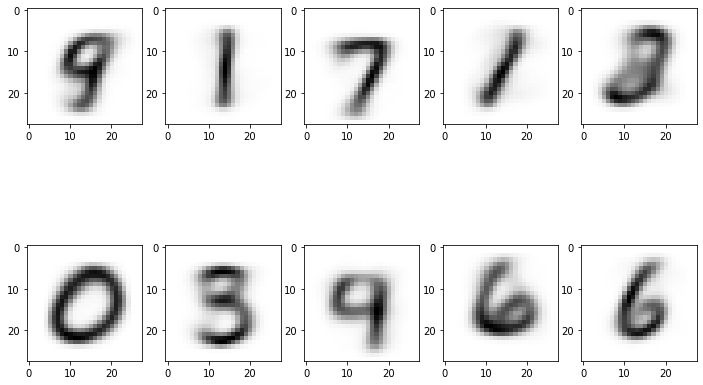

In [36]:
fig, ax = plt.subplots(figsize=(12,8))

for centroid in range(len(mini_batch_centroids)):
    plt.subplot(2, 5, centroid+1)
    
    plt.imshow(mini_batch_centroids[centroid].reshape(28,28), cmap = 'Greys')